# 파이썬라이브러리 실습

## 1. 공공데이터 데이터 분석

### [실습] 기상청 종관 데이터 분석

#### 1. 데이터 불러오기

In [3]:
import pandas as pd

file = 'data/weather_data.csv'
df = pd.read_csv(file, encoding='CP949')
print(df.columns)
df.head(2)

Index(['지점', '지점명', '일시', '평균기온(°C)', '최고기온(°C)', '최저기온(°C)', '평균현지기압(hPa)',
       '평균상대습도(%)', '월합강수량(00~24h만)(mm)', '평균풍속(m/s)', '합계 일조시간(hr)',
       '최심적설(cm)'],
      dtype='object')


,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02-01,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


#### - 데이터의 기본 정보 확인

In [4]:
df.info()  # DataFrame 기본정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54435 entries, 0 to 54434
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  54435 non-null  int64  
 1   지점명                 54435 non-null  object 
 2   일시                  54435 non-null  object 
 3   평균기온(°C)            53807 non-null  float64
 4   최고기온(°C)            54237 non-null  float64
 5   최저기온(°C)            54212 non-null  float64
 6   평균현지기압(hPa)         51997 non-null  float64
 7   평균상대습도(%)           53241 non-null  float64
 8   월합강수량(00~24h만)(mm)  54150 non-null  float64
 9   평균풍속(m/s)           53282 non-null  float64
 10  합계 일조시간(hr)         53055 non-null  float64
 11  최심적설(cm)            11895 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.0+ MB


In [11]:
df.describe()

,지점,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
count,54435.000000,53807.000000,54237.000000,54212.000000,51997.000000,53241.000000,54150.000000,53282.000000,53055.000000,11895.000000
mean,186.670341,12.628870,24.317525,2.028092,1005.837291,69.885971,110.341457,2.331489,188.699729,8.191148
std,62.081035,9.152594,8.020697,10.765021,16.180945,9.838686,120.815806,1.294391,46.280604,14.853678
min,90.000000,-13.500000,-4.800000,-32.600000,911.800000,8.000000,0.000000,-0.400000,0.000000,0.000000
25%,133.000000,4.600000,17.900000,-6.500000,1001.200000,63.000000,30.700000,1.400000,158.700000,1.500000
50%,170.000000,13.200000,25.800000,1.300000,1008.600000,71.000000,68.100000,2.000000,189.300000,4.300000
75%,245.000000,20.900000,31.100000,11.400000,1015.900000,77.000000,145.900000,2.900000,219.300000,9.000000
max,295.000000,30.200000,41.000000,24.800000,1029.700000,99.000000,1364.200000,22.700000,1300.300000,293.600000


In [12]:
df.describe()[['최고기온(°C)','최저기온(°C)']] # 데이터 추출

,최고기온(°C),최저기온(°C)
count,54237.000000,54212.000000
mean,24.317525,2.028092
std,8.020697,10.765021
min,-4.800000,-32.600000
25%,17.900000,-6.500000
50%,25.800000,1.300000
75%,31.100000,11.400000
max,41.000000,24.800000


#### 2. 컬럼명 변경하기

In [14]:
df.columns
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df.head(2)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍,일조시간,최심적설
0,90,속초,1968-01-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02-01,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


#### 3. 컬럼 추가하기
- 맨 뒤에 추가

In [15]:
df['신규'] = df['지점']
df.head(2)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍,일조시간,최심적설,신규
0,90,속초,1968-01-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN,90
1,90,속초,1968-02-01,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8,90


- 특정 위치 추가
> - DataFrame.**insert**(loc, column, value, allow_duplicates=False)

In [16]:
df.insert(1, '지점2', df['지점'])
df.head(2)

,지점,지점2,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍,일조시간,최심적설,신규
0,90,90,속초,1968-01-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN,90
1,90,90,속초,1968-02-01,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8,90


- [일시] 년도만 추출하여 컬럼 추가

In [21]:
df['일시'].str[0:4]

0        1968
1        1968
2        1968
3        1968
4        1968
         ... 
54430    2021
54431    2021
54432    2021
54433    2021
54434    2021
Name: 일시, Length: 54435, dtype: object

In [23]:
df['일시'].str.contains('1968')

0         True
1         True
2         True
3         True
4         True
         ...  
54430    False
54431    False
54432    False
54433    False
54434    False
Name: 일시, Length: 54435, dtype: bool

In [17]:
df.insert(4, '년도', df['일시'].str[0:4])
df.head(2)

,지점,지점2,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍,일조시간,최심적설,신규
0,90,90,속초,1968-01-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN,90
1,90,90,속초,1968-02-01,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8,90


#### 4. 컬럼 삭제하기
- DataFrame.**drop**(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')[source]

In [24]:
#  컬럼 1개 삭제
df.drop('지점2', axis=1, inplace=True)
df.head(2)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍,일조시간,최심적설,신규
0,90,속초,1968-01-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN,90
1,90,속초,1968-02-01,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8,90


In [25]:
# 컬럼 여러 개 삭제
df.drop(columns=['년도', '신규'], inplace=True)
df.head(2)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍,일조시간,최심적설
0,90,속초,1968-01-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02-01,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


#### 5. 특징 데이터 검색(추출)하기 : DataFrame.query()

- 지점명 추출

In [38]:
print(f"지점개수: { len(set(df['지점명']))  }")

df['지점명'].unique()

지점개수: 102


array(['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '관악산', '수원', '영월', '충주', '서산', '울진',
       '청주', '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원',
       '광주', '부산', '통영', '무안', '목포', '여수', '흑산도', '완도', '고창', '순천',
       '진도(첨찰산)', '대구(기)', '홍성', '제주', '고산', '성산', '서귀포', '진주', '강화',
       '양평', '이천', '인제', '홍천', '삼척', '태백', '정선군', '제천', '보은', '천안', '보령',
       '부여', '금산', '세종', '부안', '임실', '정읍', '남원', '장수', '고창군', '영광군',
       '김해시', '순창군', '북창원', '주암', '양산시', '보성군', '강진군', '장흥', '해남', '고흥',
       '의령군', '함양군', '성산포', '광양시', '진도군', '봉화', '영주', '문경', '청송군', '영덕',
       '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해'],
      dtype=object)

- 지점명 = 강릉 추출

In [48]:
df.query(" 일시 == '1904-04-01'")
df.query(" 지점명 =='강릉' ")

df[ df['지점명'] == '강릉' ].head(2)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍,일조시간,최심적설
3344,105,강릉,1911-10-01,NaN,26.2,6.0,NaN,NaN,36.5,NaN,NaN,NaN
3345,105,강릉,1911-11-01,NaN,19.5,-1.3,NaN,NaN,32.7,NaN,NaN,NaN


In [47]:
# 해당 데이터의 인덱스만 추출
df.index[ df['지점명'] == '속초' ]

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            638, 639, 640, 641, 642, 643, 644, 645, 646, 647],
           dtype='int64', length=648)

- **또는(|) , 포함(in)** 조건 사용: 강릉 또는 속초 데이터 추출

In [58]:
# 또는(|) , 포함(in) 조건 사용
df.query(" 지점명=='강릉' | 지점명=='속초' ").head(2)
df.query(" 지점명 in ('강릉','속초','동해') ")

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍,일조시간,최심적설
0,90,속초,1968-01-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02-01,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03-01,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04-01,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05-01,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5008,106,동해,2021-08-01,23.8,31.9,18.3,1004.4,86.0,423.3,1.6,108.3,NaN
5009,106,동해,2021-09-01,20.8,28.3,15.0,1010.0,84.0,176.8,1.6,169.1,NaN
5010,106,동해,2021-10-01,15.8,29.5,3.8,1016.1,76.0,150.5,1.8,164.6,NaN
5011,106,동해,2021-11-01,10.9,20.5,0.8,1012.7,54.0,7.6,2.1,213.2,NaN


- **그리고(&)** 조건 사용

In [59]:
df.query(" 지점명=='강릉' & 최고기온 > 10 ")

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍,일조시간,최심적설
3344,105,강릉,1911-10-01,NaN,26.2,6.0,NaN,NaN,36.5,NaN,NaN,NaN
3345,105,강릉,1911-11-01,NaN,19.5,-1.3,NaN,NaN,32.7,NaN,NaN,NaN
3346,105,강릉,1911-12-01,NaN,15.1,-5.6,NaN,NaN,25.2,NaN,NaN,NaN
3348,105,강릉,1912-02-01,2.7,13.3,-5.1,NaN,64.0,146.4,7.0,179.9,NaN
3349,105,강릉,1912-03-01,5.8,19.4,-2.1,NaN,61.0,43.4,5.7,201.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4652,105,강릉,2021-08-01,25.5,36.5,18.4,1006.0,77.0,438.1,1.8,72.9,NaN
4653,105,강릉,2021-09-01,21.7,29.6,15.8,1011.8,77.0,111.6,1.7,134.2,NaN
4654,105,강릉,2021-10-01,16.5,32.3,2.7,1017.9,70.0,130.9,1.9,159.1,NaN
4655,105,강릉,2021-11-01,11.1,22.2,-0.2,1014.4,52.0,13.1,2.6,197.5,NaN


- **최소(min).일시** 추출하기

In [66]:
df['일시'].min()
df.query(" 일시 == '1904-04-01'")

df.query(f" 일시 == '{ df['일시'].min() }' ")

df[ df['일시'] == df['일시'].min() ]

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍,일조시간,최심적설
6369,112,인천,1904-04-01,NaN,19.2,6.4,NaN,NaN,104.9,NaN,NaN,NaN
21791,159,부산,1904-04-01,NaN,21.4,4.7,NaN,NaN,172.9,NaN,NaN,NaN
23944,165,목포,1904-04-01,NaN,20.2,NaN,NaN,NaN,34.7,NaN,NaN,NaN


- **최대(max)일시** 추출하기

In [ ]:
df.query(f" 일시 == '{ df['일시'].max() }' ")

df[ df['일시'] == df['일시'].max() ].head(2)

In [69]:
df.query(f" 지점명=='강릉' & 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍,일조시간,최심적설
4656,105,강릉,2021-12-01,4.4,17.1,-12.0,1018.8,48.0,43.9,2.9,207.2,NaN


### [실습] 전체에서 가장 더웠던 해와 기온은? 

In [95]:
# 컬럼 추출
df['최고기온'].max()
df.최고기온.max()


# 행 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ")
df[ df.최고기온 == df.최고기온.max() ]


# 행 추출 특정 컬럼값(year) 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:4]
df[ df.최고기온 == df.최고기온.max()  ].일시.str[0:4]


# 행 추출 특정 컬럼값(최고기온) 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ").최고기온
df[ df.최고기온 == df.최고기온.max() ].최고기온

34762    41.0
Name: 최고기온, dtype: float64

In [96]:
df[ df.최고기온 == df.최고기온.max() ].지점명

34762    홍천
Name: 지점명, dtype: object

In [98]:
df.query(f" 지점명 == '강릉' ").최고기온.max()

39.4

#### 그룹핑(groupby()) 하기
- DataFrame.**agg**(func=None, axis=0, *args, **kwargs)[source]

In [111]:
df.groupby(df['지점명']).mean()
df.groupby(df.지점명).mean()
df.groupby('지점명').mean()

,지점,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍,일조시간,최심적설
지점명,,,,,,,,,,
강릉,105.0,12.551719,24.977913,2.261995,1013.760566,64.095420,112.119131,2.919847,190.108672,17.191809
강진군,259.0,13.688194,24.944521,3.445890,1015.421528,71.937500,119.152055,2.417931,184.370548,7.450000
강화,201.0,11.123810,22.437521,0.131993,1012.365986,70.301020,107.645813,1.738095,203.184812,4.911034
거제,294.0,14.186565,24.367114,4.575839,1013.037585,66.811224,155.911092,1.792687,197.441468,3.147727
거창,284.0,11.765476,25.072027,-0.346231,989.892794,70.064626,106.362395,1.339116,199.919283,5.467901
...,...,...,...,...,...,...,...,...,...,...
합천,285.0,13.025680,26.040986,1.271939,1012.804770,68.022109,107.293186,1.216014,195.761263,3.942857
해남,261.0,13.407993,24.497351,2.577649,1013.453571,74.362245,109.593950,2.107496,194.226451,4.406107
홍성,177.0,12.627027,24.409459,1.475676,1013.752703,75.824324,95.486486,1.505405,202.408108,4.771429


In [105]:
df['평균기온'].groupby(df['지점명']).mean()
df.평균기온.groupby(df.지점명).mean()

지점명
강릉     12.551719
강진군    13.688194
강화     11.123810
거제     14.186565
거창     11.765476
         ...    
합천     13.025680
해남     13.407993
홍성     12.627027
홍천     10.532653
흑산도    13.564000
Name: 평균기온, Length: 102, dtype: float64

In [121]:
df.groupby('지점명')['평균기온'].agg('mean')
df.groupby('지점명')['평균기온'].agg(**{'평균':'mean'})

,평균
지점명,
강릉,12.551719
강진군,13.688194
강화,11.123810
거제,14.186565
거창,11.765476
...,...
합천,13.025680
해남,13.407993
홍성,12.627027


In [126]:
# df.groupby('지점명')['평균기온']
df.groupby(['지점명','년도'])['평균기온'].agg( **{'평균':'mean'} )

# df_ = df.groupby(['지점명','년도'])['평균기온'].agg( **{'평균':'mean'} )
# df_.columns

평균
지점명 년도             
강릉  1911        NaN
    1912  11.733333
    1913  11.683333
    1914  13.175000
    1915  12.091667
...             ...
흑산도 2017  13.491667
    2018  13.825000
    2019  14.066667
    2020  14.100000
    2021  15.258333

[4560 rows x 1 columns]

### [실습] 지점별 년도별 최다강수량 추출하기

In [128]:
df.groupby(['지점명','년도'])['월합강수량'].agg( **{'최다월합강수량':'max'} )

최다월합강수량
지점명 년도           
강릉  1911     36.5
    1912    346.1
    1913    232.5
    1914    383.4
    1915    302.3
...           ...
흑산도 2017    262.9
    2018    244.3
    2019    201.7
    2020    305.2
    2021    176.0

[4560 rows x 1 columns]

- **인덱스 초기화**하기

In [129]:
df.groupby(['지점명','년도'])['월합강수량'].agg( **{'최다월합강수량':'max'} ).reset_index()

,지점명,년도,최다월합강수량
0,강릉,1911,36.5
1,강릉,1912,346.1
2,강릉,1913,232.5
3,강릉,1914,383.4
4,강릉,1915,302.3
...,...,...,...
4555,흑산도,2017,262.9
4556,흑산도,2018,244.3
4557,흑산도,2019,201.7
4558,흑산도,2020,305.2


### DataFrame 구조 변경하기: pivot()
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html
- DataFrame.**pivot**(index=None, columns=None, values=None)

In [143]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [148]:
df.pivot(index='foo', columns='bar', values='baz')
df.pivot(index='foo', columns='bar')['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [147]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])
df.pivot(index='foo', columns='bar')[['baz', 'zoo']]


baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

#### 6. 시각화하기

##### 관측 지점별 평균기온 그래프

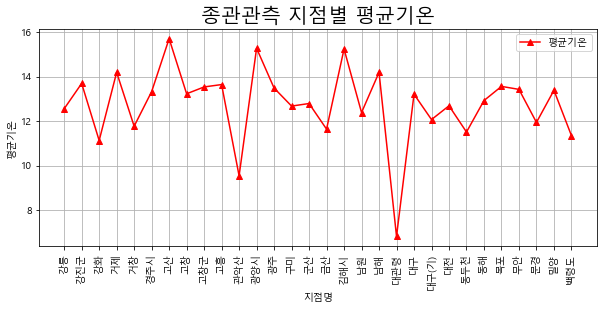

In [253]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 4)

# 1.데이터 불러오기
file = 'data/weather_data.csv'
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4] 
df.head(2)

# 3.지점별 평균 구하기(지점 30개만 추출)
df_ = df.groupby('지점명').평균기온.agg(**{'평균기온':'mean'}).head(30)

X = df_.index
Y = df_['평균기온']

# plt.plot(df_, '^', linestyle='solid', c='r', label='평균기온')
plt.plot(X, Y, '^', linestyle='solid', c='r', label='평균기온')
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점명'); plt.ylabel('평균기온');
plt.legend(); plt.grid(); 
plt.show()

##### 강릉지점의 년도별 평균기온(막대)&최고기온(선) 그래프 그리기

In [194]:
data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).head(3)

,평균기온
년도,
1911,NaN
1912,11.733333
1913,11.683333


In [195]:
data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).head(3).reset_index()

,년도,평균기온
0,1911,NaN
1,1912,11.733333
2,1913,11.683333


- 단일 그래프 사용할 경우

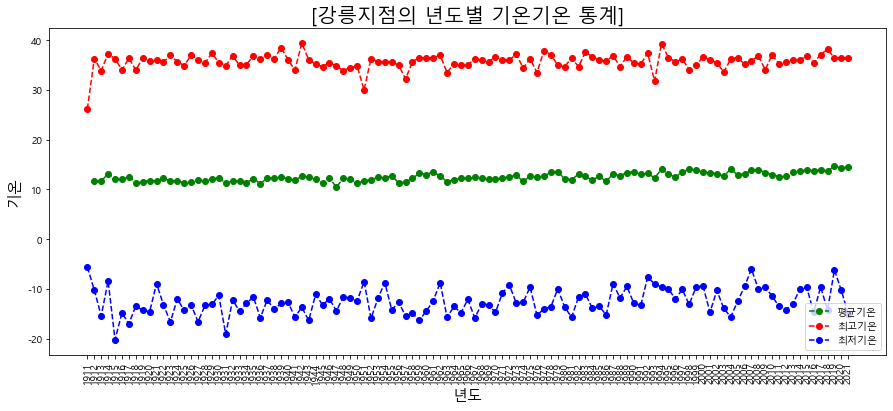

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15,6))

data = df.query(" 지점명=='강릉' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'})
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'})
data3 = data.groupby('년도')['최저기온'].agg(**{'최저기온':'min'})

# 방법1: plot만 사용할 경우
plt.plot(data1, 'o', linestyle='dashed', c='g', label='평균기온')
plt.plot(data2, 'o', linestyle='dashed', c='r', label='최고기온')
plt.plot(data3, 'o', linestyle='dashed', c='b', label='최저기온')
# 방법2: plot만 사용할 경우, 혼합 그래프 사용할 경우
# X = data1.index
# Y1= data1['평균기온']
# Y2= data2['최고기온']
# Y3= data3['최저기온']
# plt.plot(X, Y1, 'o', linestyle='dashed', c='g', label='평균기온')
# plt.plot(X, Y2, 'o', linestyle='dashed', c='r', label='최고기온')
# plt.plot(X, Y3, 'o', linestyle='dashed', c='b', label='최저기온')

plt.title('[강릉지점의 년도별 기온기온 통계]', fontsize=20)
plt.xlabel('년도', fontsize=15)
plt.ylabel('기온', fontsize=15)
plt.xticks(rotation=90)
plt.legend()
plt.show()

- 혼합 그래프 사용(막대+선)

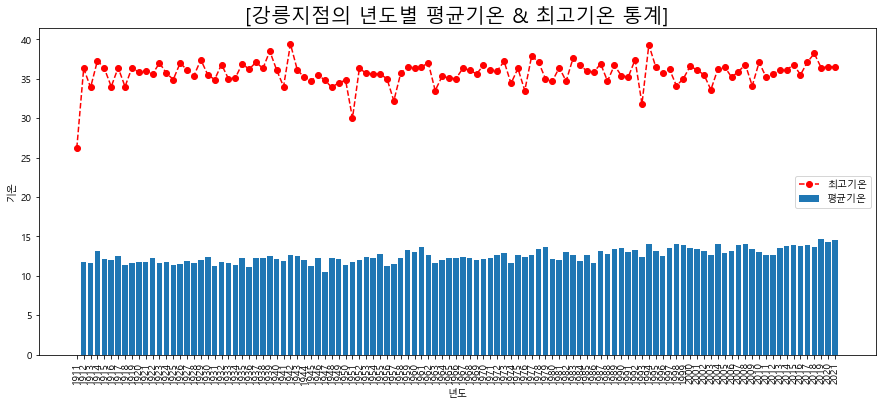

In [211]:
plt.figure(figsize=(15,6))

data = df.query(" 지점명=='강릉' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'})
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'})

X = data1.index
Y1= data1['평균기온']
Y2= data2['최고기온']

plt.bar(X, Y1, label='평균기온')
plt.plot(X, Y2, 'o', linestyle='dashed', c='r', label='최고기온')
plt.title('[강릉지점의 년도별 평균기온 & 최고기온 통계]', fontsize=20)
plt.xlabel('년도')
plt.ylabel('기온')
plt.legend()
plt.xticks(rotation=90)

# 그래프 저장하기
plt.savefig('graph/강릉지점년도별기온통계.png')  

plt.show()

#### 7. 가공된 데이터 저장하기

In [256]:
# df.groupby(['지점명','년도'])['월합강수량', '평균기온'].agg( **{'최다월합강수량':'max', '평균기온':'mean'} ) 
df.groupby(['지점명','년도'])['월합강수량', '평균기온'].agg( 'mean') 
data =  df.groupby(['지점명','년도'])['월합강수량', '평균기온'].agg( ['mean','max']) 

data.to_csv('data/test.csv', encoding='cp949')

df_ = pd.read_csv('data/test.csv', encoding='cp949')

#컬럼이 2단으로 되어 있을때 컬럼지정하는 방법
# df_.columns = [['월합강수량','월합강수량', '평균기온', '평균기온'],
#              ['mean1', 'max1', 'mean2', 'max2']]
df_

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_6356/2135386754.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['지점명','년도'])['월합강수량', '평균기온'].agg( 'mean')
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_6356/2135386754.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data =  df.groupby(['지점명','년도'])['월합강수량', '평균기온'].agg( ['mean','max'])


,Unnamed: 0,Unnamed: 1,월합강수량,월합강수량.1,평균기온,평균기온.1
0,NaN,NaN,mean,max,mean,max
1,지점명,년도,NaN,NaN,NaN,NaN
2,강릉,1911,31.46666666666667,36.5,NaN,NaN
3,강릉,1912,114.325,346.1,11.733333333333334,24.1
4,강릉,1913,79.175,232.5,11.683333333333332,22.5
...,...,...,...,...,...,...
4557,흑산도,2017,62.24166666666667,262.9,13.491666666666667,24.9
4558,흑산도,2018,126.35000000000001,244.3,13.825000000000001,27.3
4559,흑산도,2019,89.925,201.7,14.066666666666668,24.7
4560,흑산도,2020,98.93333333333334,305.2,14.1,25.4


In [232]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 4)

# 1.데이터 불러오기
file = 'data/weather_data.csv'
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4] 
df.head(2)


data = df.query(" 지점명=='강릉' ")
data1 = data.groupby(['년도'])['평균기온'].agg(**{'평균기온':'mean'}) 
data2 = data.groupby(['년도'])['최고기온'].agg( **{'최고기온':'max'})
data3 = data.groupby(['년도'])['최저기온'].agg( **{'최저기온':'min'})

pd.concat([data1,data2,data3])

,평균기온,최고기온,최저기온
년도,,,
1911,NaN,NaN,NaN
1912,11.733333,NaN,NaN
1913,11.683333,NaN,NaN
1914,13.175000,NaN,NaN
1915,12.091667,NaN,NaN
...,...,...,...
2017,NaN,NaN,-9.6
2018,NaN,NaN,-14.2
2019,NaN,NaN,-6.2


### [실습] 대랑 데이터(AIHub) 사용하기
- 파일명 : vw_04_msr_wqmn.csv (약 48M)

In [292]:
import pandas as pd

file = 'data/vw_04_msr_wqmn.csv'
df = pd.read_csv(file, encoding='CP949')
df

,년도,월,회차,수질측정망 명,수질측정망 코드,위도,경도,검사 일자,항목 코드,항목 명,값,항목 정제 여부
0,1989,1,1,경안천4,1016A50,37.392500,127.251638,19890109,1012,암모니아성질소(NH₃-N),NaN,NaN
1,1989,1,1,경안천4,1016A50,37.392500,127.251638,19890109,1013,질산성질소(NO₃-N),NaN,NaN
2,1989,1,1,경안천4,1016A50,37.392500,127.251638,19890109,1039,수소이온농도(pH),7.000,NaN
3,1989,1,1,경안천4,1016A50,37.392500,127.251638,19890109,1049,화학적산소요구량(COD),4.400,NaN
4,1989,1,1,경안천4,1016A50,37.392500,127.251638,19890109,1050,전기전도도(EC),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
540954,1996,1,1,봉황천,3004A30,36.107638,127.553875,19960121,1066,용존총질소(DTN),NaN,NaN
540955,1996,1,1,봉황천,3004A30,36.107638,127.553875,19960121,1067,용존총인(DTP),NaN,NaN
540956,1996,1,1,봉황천,3004A30,36.107638,127.553875,19960121,1073,총유기탄소(TOC),NaN,NaN
540957,1996,1,1,영동,3004A50,36.209066,127.709750,19960122,1012,암모니아성질소(NH₃-N),0.215,NaN


#### - 컬럼에서 공백제거하고 컬러명으로 지정

In [293]:
df.columns = [ name.replace(' ', '') for name in df.columns]
df.columns

Index(['년도', '월', '회차', '수질측정망명', '수질측정망코드', '위도', '경도', '검사일자', '항목코드', '항목명',
       '값', '항목정제여부'],
      dtype='object')

#### - 최근 검사일자 추출

In [269]:
# print(f"최근측정일자:  {df['검사 일자'].max()} ")
# print(f"최초측정일자:  {df['검사 일자'].min()} ")

print(f"최근측정일자:  {df['검사일자'].max()} ")
print(f"최초측정일자:  {df['검사일자'].min()} ")

최근측정일자:  19960129 
최초측정일자:  19890104 


#### - 하천명  &  항목명 추출

In [294]:
print(f'수질측정망 개수: {len(df.수질측정망명.unique())} ')
print(f'수질측정망: {df.수질측정망명.unique()} ')
print('-'*30)
print(f'항목명 개수: {len(df.항목명.unique())} ')
print(f'항목명 개수: {df.항목명.unique()} ')

수질측정망 개수: 726 
수질측정망: ['경안천4' '성내천' '탄천5' '중랑천1' '중랑천4' '안양천5' '오산천3' '황구지천3' '진위천3' '보통저수지'
 '봉화' '안동1' '반변천2' '안동2' '예천' '내성천2' '상주1' '상주2' '위천2' '상주3' '감천2' '구미'
 '달성' '금호강1' '금호강3' '금호강4' '금호강5' '금호강6' '회천2' '고령' '현풍' '창녕' '거창위천2'
 '황강3' '합천' '함양위천2' '덕천강1' '남지' '삼랑진' '밀양강2' '물금' '양산천1' '양산천2' '구포' '기계천'
 '형산강2' 'C구무천' '대암' '망성' '동천' '영덕' '무주남대천' '제원' '영동' '영동천2' '초강2' '현도'
 '갑천1' '갑천3' '유등천1' '갑천5' '보강천' '미호천4' '무심천1' '무심천3' '미호천5' '연기' '공주1'
 '유구천' '공주2' '지천' '부여1' '금천' '부여2' '석성천' '노성천' '논산천2' '강경천' '강경' '길산천'
 '삽교천2' '무한천2' '곡교천2' '고산' '소양천2' '전주' '삼천1' '삼례' '김제' '동진강2' '정읍천4'
 '고부천2' '원평천2' '오수천' '남원' '요천' '곡성' '보성천' '구례' '하동' '우치' '광주1' '광주천1'
 '광주천2' '광주2' '황룡강3' '지석천2' '광산' '나주' '고막원천2' '함평천2' '함평' '무안2' '탐진강1'
 '탐진강3' '홍천강2' '공릉천3' '한탄강3' '임진강3' '문산천3' '양양' '강릉' '삼척' '왕숙천3' '무안1'
 '계룡저수지' '안양천4' '백곡저수지1' '미호저수지' '감돈저수지' '가평천3' '조종천3' '탄천4' '영평천3' '한탄강2'
 '신천2' '신천3' '진위천2' '황구지천2' '간성북천' '포남' '사직' '황지1' '철암천' '용전천1' '미천'
 '영주서천' '한천' '영강2' '쌍계천' '양천' '경호강2' '영천강' '남강2' '남강

#### - 정렬하기 : 하천명, 년도별로 데이터 정렬하기

In [315]:
df[df['수질측정망명'].str.contains('안양천')].sort_values(by=[df.columns[3], df.columns[0]]).head(3)

,년도,월,회차,수질측정망명,수질측정망코드,위도,경도,검사일자,항목코드,항목명,값,항목정제여부
104397,1992,3,1,안양천1,1018A60,37.363302,126.955883,19920317,1012,암모니아성질소(NH₃-N),NaN,NaN
104398,1992,3,1,안양천1,1018A60,37.363302,126.955883,19920317,1013,질산성질소(NO₃-N),NaN,NaN
104399,1992,3,1,안양천1,1018A60,37.363302,126.955883,19920317,1039,수소이온농도(pH),7.2,NaN


#### - 특정조건에 해당하는 데이터 검색: 안양천의 BOD, COD

In [301]:
df[df['수질측정망명'].str.contains('안양천')].수질측정망명.unique()

array(['안양천5', '안양천4', '안양천1', '안양천2', '안양천3'], dtype=object)

#### - 그래프로 나타내기 : 안양천1의 년도별 생물학적산소요구량(BOD)&화학적산소요구량(COD)

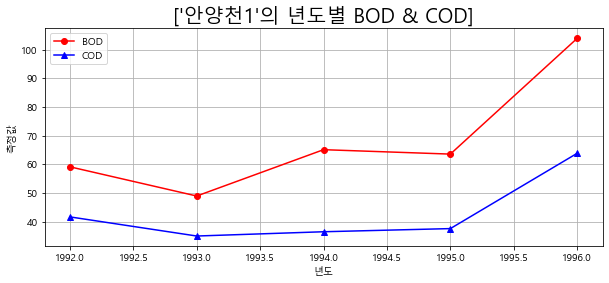

In [334]:
import pandas as pd

file = 'data/vw_04_msr_wqmn.csv'
df = pd.read_csv(file, encoding='CP949')
df
df.columns = [ name.replace(' ', '') for name in df.columns]
df.columns

data1 = df.query(" 수질측정망명=='안양천1' and 항목명 == '생물학적산소요구량(BOD)'")
data1 = data1.groupby(['년도'])['값'].agg(**{'평균':'mean'})
data2 = df.query(" 수질측정망명=='안양천1' and 항목명 == '화학적산소요구량(COD)'")
data2 = data2.groupby(['년도'])['값'].agg(**{'평균':'mean'})
data2

#방법1: DataFrame 바로 사용
# plt.plot(data1, 'o', linestyle='solid', c='r', label='BOD')
# plt.plot(data2, '^', linestyle='solid', c='b', label='COD')

#방법2 : X, Y축 값 직접 지정
X = data1.index
Y1= data1.평균
Y2= data2.평균
plt.plot(X, Y1, 'o', linestyle='solid', c='r', label='BOD')
plt.plot(X, Y2, '^', linestyle='solid', c='b', label='COD')

plt.title("['안양천1'의 년도별 BOD & COD]", fontsize=20)
plt.xlabel('년도')
plt.ylabel('측정값')
plt.legend()
plt.grid()
plt.show()

### 지도에 표시하기

#### - 하천명(위도, 경도) 추출 : groupby()이용

In [284]:
# 하천명(수질측정망명, 위도, 경도) 추출 : groupby()이용
df.groupby(['수질측정망명','위도', '경도' ])['검사일자'].agg(**{'검사일':'count'}).reset_index()

,수질측정망명,위도,경도,검사일
0,C구무천,36.004080,129.368652,1462
1,C외천천,36.493916,127.403175,204
2,가곡,37.038583,128.405833,425
3,가곡천,37.164222,129.342638,765
4,가대천,37.042180,128.403300,425
...,...,...,...,...
724,흑천1,37.501583,127.636813,408
725,흑천2,37.463250,127.529888,408
726,흥덕저수지,35.557108,126.716572,68
727,흥부저수지,37.383555,126.832866,34


#### - 수질측정망 위치 정보(위도, 경도)를 이용하여 지도에 표시하기

In [335]:
import folium
import webbrowser
import pandas as pd

file = 'data/vw_04_msr_wqmn.csv'
df = pd.read_csv(file, encoding='CP949')

# 컬럼명에서 공백 제거하기
df.columns = [ name.replace(' ', '') for name in df.columns]
df.columns

df_ = df.groupby(['수질측정망명','위도', '경도' ])['검사일자'].agg(**{'검사일':'count'}).reset_index()


# 지도 표시 객체 생성하기
# map_data = folium.Map(zoom_start=15)
map_data = folium.Map(location=[36.00408, 129.368652], zoom_start=8)

# 데이터를 한 행씩 읽어서 지도표시 객체에 추가하기
for i, row in df_.iterrows():
#     print(row)
    folium.Marker(location=[row['위도'], row['경도']],
                  popup=row['수질측정망명'], icon=folium.Icon(color='blue', icon='star')
                  ).add_to(map_data)

# 지도 객체를 html파일로 저장하기    
html_file = 'data/map_water.html'    
map_data.save('data/map_water.html')

# html 파일을 기본브라우저에서 실행하기
webbrowser.open('C:/python/stat_python/'+html_file)

True

------

## 2. 웹 데이터 분석

### [실습] CSV파일 데이터 분석(코로나 예방접종 센터)

### [실습] OpenAI 데이터 수집 데이터 분석(네이버 책 검색)

### [실습] 웹 크롤링 데이터 수집 데이터 분석(네이버 뉴스 검색)

### [실습] 자유롭게 데이터 선정 후 Pandas DataFrame과 그래프로 시각화히기